In [49]:
import numpy as np
from manim import *
from yty_manim.basic_unit.squ_tex import *
from yty_manim.disposition.fonts_and_colors import *
from yty_manim.basic_unit.code_step import *
from yty_manim.application.matrix_yty import *
config.background_color = WHITE

In [2]:
%%manim -qh -v WARNING Trans
class Trans(Scene):
    def construct(self):

        s = Square(**typedict["default_type"]).scale(2)
        c = Circle(
            fill_color = BLUE,
            fill_opacity = 0.5,
            stroke_opacity = 0.8,
            color = BLUE
        ).set_color(GREEN)
        t = Text(
            "智算视界",
            font=text_font[0],
        ).set_color_by_gradient(gradient_dict["Tempting_Azure_dark"]).scale(2).shift(RIGHT * 2)
        self.play(Create(s),run_time=1)
        self.wait()
        self.play(Transform(s, c),run_time=1)
        self.wait()
        self.play(Transform(s, t[0]),run_time=1)
        self.wait()
        self.play(Write(t[1]),run_time=1)
        self.wait()
        self.add(t[2:])
        self.remove(s)
        self.play(t.animate.arrange(),run_time=1)
        self.wait()

Manim Community v0.19.0

In [3]:
%%manim -qh -v WARNING TransCode
class TransCode(Scene):
    def construct(self):
        c_tc = """
        self.play(Create(s))
        self.play(Transform(s, c))
        self.play(Transform(s, t[0]))
        self.play(Write(t[1]))
        self.play(t.animate.arrange())"""
        t_c = Code(
            code_string=c_tc,
            language="python",
            background="rectangle",
            formatter_style = Code.get_styles_list()[32],
        ).scale(1.5)
        for i in range(len(t_c[2])):
            self.play(Write(t_c[2][i]),run_time=1)
            self.wait()

Manim Community v0.19.0

In [56]:
%%manim -qh -v WARNING Bb
class Bb(Scene):
    def construct(self):
        c_bb = """
        for i in range(len(lst)):
            min_val = lst[i]
            index = i
            temp = 0
            for j in range(i,len(lst)):
                if lst[j] < min_val:
                    min_val  = lst[j]
                    index = j
            if i != index:
                temp = lst[i]
                lst[i] = min_val
                lst[index] = temp"""
        t_bb = Code(
            code_string=c_bb,
            language="python",
            background="rectangle",
            formatter_style = Code.get_styles_list()[32],
        ).scale(1.5).shift(UP*0.5)

        def bb(lst):
            for i in range(len(lst)):
                min_val = lst[i]
                index = i
                temp = 0
                for j in range(i+1,len(lst)):
                    if min_val < lst[j]:
                        min_val  = lst[j]
                        index = j
                temp = lst[i]
                lst[i] = min_val
                lst[index] = temp

        arr = Triangle(fill_opacity=0.8).set_color(GOLD).move_to(t_bb[1][4]).scale(0.25).rotate(-PI/2)


        num_lst = [6,2,3,1,9,0]
        color_lst = [RED, ORANGE, GREEN_D, TEAL_D, BLUE_D, PURPLE]
        st = SquTexSlide(
            num_lst,
            side_length=1.5,
            # fill_opacity = 0.5,
            # stroke_opacity = 0.8,
            fill_opacity = 0,
            stroke_opacity = 0,
        ).fade(1)
        hl = Square(side_length=1.5).set_color(YELLOW).move_to(st[0]).fade(1)
        pointer = Triangle(fill_opacity=0.8).set_color(GOLD).scale(0.25).next_to(st[1],DOWN).fade(1)
        for i in range(len(st)):
            st[i].set_color(color_lst[i])

        val_vgp = VGroup(
            Variable(0,"i",num_decimal_places=0),
            Variable(0,"j",num_decimal_places=0),
            Variable(0,"min",num_decimal_places=0),
            Variable(0,"index",num_decimal_places=0),
        ).arrange(buff=2).shift(DOWN*3.5).set_color(BLUE_E)

        i_tracker = val_vgp[0].tracker
        j_tracker = val_vgp[1].tracker
        min_tracker = val_vgp[2].tracker
        index_tracker = val_vgp[3].tracker

        self.add(st,hl,t_bb[2],arr,val_vgp,pointer)

        for i in range(len(num_lst)):
            min_val = num_lst[i]
            index = i

            arr.move_to(t_bb[1][0])
            self.play(
                arr.animate.move_to(t_bb[1][4]),
                i_tracker.animate.set_value(i),
                hl.animate.move_to(st[i]),
                run_time=1
            )
            for j in range(i,len(num_lst)):
                arr.move_to(t_bb[1][4])
                if num_lst[j] < min_val:
                    min_val  = num_lst[j]
                    index = j
                self.play(
                    index_tracker.animate.set_value(index),
                    j_tracker.animate.set_value(j),
                    min_tracker.animate.set_value(min_val),
                    pointer.animate.next_to(st[j],DOWN),
                    arr.animate.move_to(t_bb[1][7]),
                    run_time=1,
                )

            if i != index:
                self.play(
                    *st.pop(index,force_center=True),
                    *st.pop(i,force_center=True),
                    run_time = 1
                )
                st_i = SquTexSlide(
                    f"{num_lst[i]}",
                    **typedict["default_type"]
                ).set_color(WHITE)
                # ).set_color(color_lst[i])
                st_index = SquTexSlide(
                    f"{num_lst[index]}",
                    **typedict["default_type"]
                ).set_color(WHITE)
                # ).set_color(color_lst[index])
                self.play(
                    *st.push(st_index,i,force_center=True,force_color=True),
                    *st.push(st_i,index,force_center=True,force_color=True),
                    arr.animate.move_to(t_bb[1][-1]),
                    run_time = 1
                )
                temp = num_lst[i]
                num_lst[i] = num_lst[index]
                num_lst[index] = temp
                t_c = color_lst[i]
                color_lst[i] = color_lst[index]
                color_lst[index] = t_c


Manim Community v0.19.0

Manim Community v0.19.0

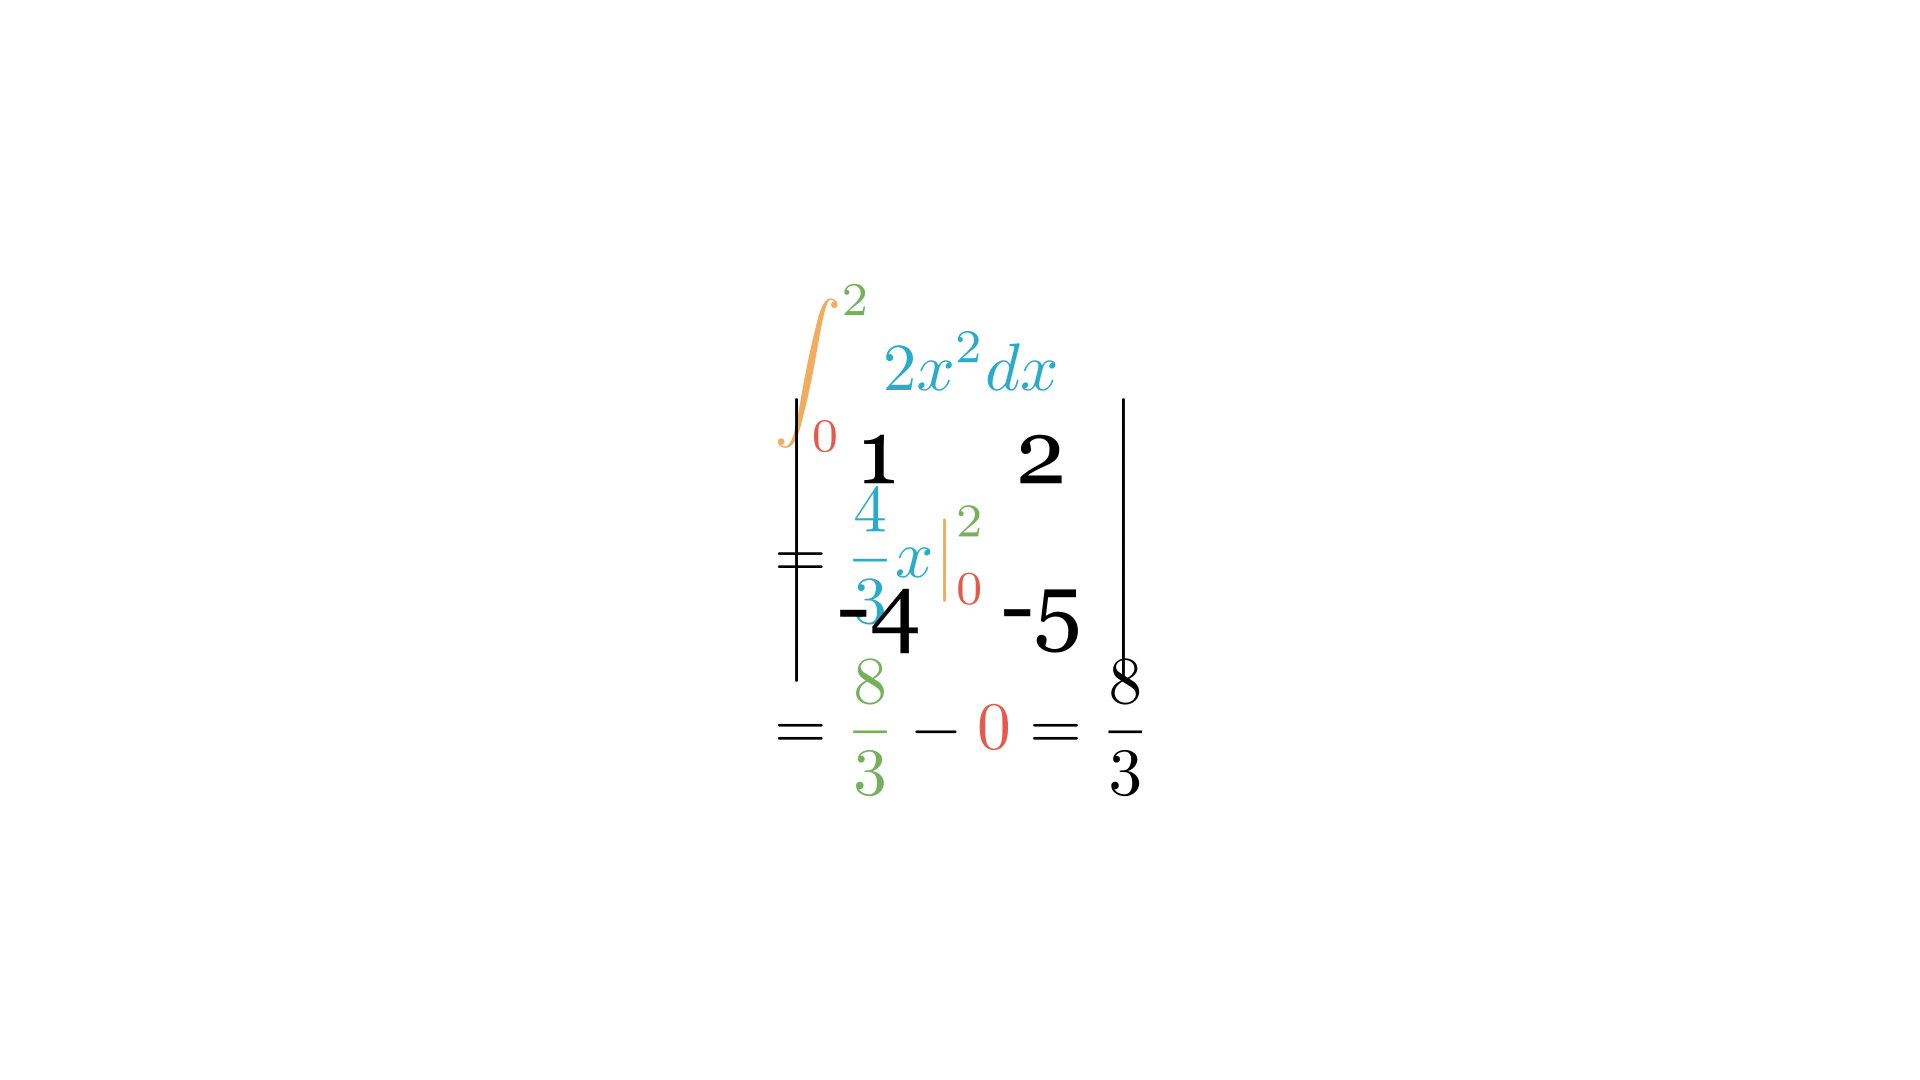

In [54]:
%%manim -qh -v WARNING IntegralVisualization

class IntegralVisualization(Scene):
    def construct(self):
        vgp = VGroup()
        mt = MathTex("\int_0^2 2x^2 dx").set_color(BLACK)
        mt[0][0].set_color(GOLD)
        mt[0][1].set_color(GREEN_D)
        mt[0][2].set_color(RED_D)
        mt[0][3:].set_color(BLUE_D)
        mt1 = MathTex("= \\frac{4}{3}x\\right|^2_0").set_color(BLACK)
        mt1[0][1:5].set_color(BLUE_D)
        mt1[0][5:7].set_color(GOLD)
        mt1[0][7].set_color(GREEN_D)
        mt1[0][8].set_color(RED_D)
        mt2 = MathTex("= \\frac{8}{3} - 0 = \\frac{8}{3}").set_color(BLACK)
        mt2[0][1:4].set_color(GREEN_D)
        mt2[0][5].set_color(RED_D)
        vgp.add(mt,mt1,mt2).arrange(DOWN,aligned_edge=LEFT)

        m = MatrixDet(
            np.array([
                [1, 2],
                [-4, -5],
            ])
        ).set_color(BLACK)

        self.add(vgp,m)

In [73]:
%%manim -qh -v WARNING MatrixShow

class MatrixShow(Scene):
    def construct(self):
        mat_input = np.array([
            [0, 6],
            [2, 3],
        ])
        mat_mob = MatrixDet(mat_input).set_color(BLACK)
        st = SquTex("0",side_length=1,fill_opacity = 0)
        st[0][1].set_color(BLACK).shift(LEFT)
        st[0][0].set_color(GOLD).shift(RIGHT)
        hl_g = VGroup(
            Square(side_length=1,fill_opacity = 0).move_to(mat_mob[0][1]),
            Square(side_length=1,fill_opacity = 0).move_to(mat_mob[1][0]),
            Square(side_length=1,fill_opacity = 0).move_to(mat_mob[1][1]),
        ).set_color(GOLD)
        self.play(Create(st[0][1]))
        self.play(Create(st[0][0]))
        self.play(st[0][0].animate.shift(LEFT),st[0][1].animate.shift(RIGHT))
        self.play(
            st.animate.move_to(mat_mob[0][0]),
            FadeIn(mat_mob[1],mat_mob[0][1]),
            FadeIn(hl_g),
        )
        self.add(mat_mob[0][0])
        self.remove(st[0][1])
        self.play(Uncreate(hl_g),Uncreate(st[0][0]))
        self.play(Create(mat_mob[2:]))


Manim Community v0.19.0

In [80]:
%%manim -qh -v WARNING MatrixDetShow

color_list = [RED,ORANGE,YELLOW_E,GREEN,TEAL,BLUE,PURPLE,PINK,DARK_BROWN,GOLD]
time_control = 0.5

class MatrixDetShow(Scene):
    def construct(self):
        mat_input = np.array([
            [0, 6, 1],
            [2, 3, 9],
            [5, 1, 7]
        ])
        mat_mob = MatrixDet(mat_input).set_color(BLACK)
        st = SquTex("0",side_length=1,fill_opacity = 0)
        st[0][1].set_color(BLACK).shift(LEFT)
        st[0][0].set_color(GOLD).shift(RIGHT)
        hl_g = VGroup()
        for i in range(len(mat_input)):
            for j in range(len(mat_input[0])):
                if i != 0 or j != 0:
                    s = Square(side_length=1,fill_opacity = 0).move_to(mat_mob[i][j])
                    hl_g.add(s)
        hl_g.set_color(GOLD)
        self.play(Create(st[0][1]))
        self.play(Create(st[0][0]))
        self.play(st[0][0].animate.shift(LEFT),st[0][1].animate.shift(RIGHT))
        self.play(
            st.animate.move_to(mat_mob[0][0]),
            FadeIn(mat_mob[1:-2],mat_mob[0][1:]),
            FadeIn(hl_g),
        )
        self.add(mat_mob[0][0])
        self.remove(st[0][1])
        self.play(Uncreate(hl_g),Uncreate(st[0][0]))
        self.play(Create(mat_mob[2:]))
        length = len(mat_input)

        mat_mob_det = mat_mob.det_mat()
        neg_mat = mat_mob.neg_with_brackets()
        neg_mat = neg_mat.det_mat()
        neg_mat.set_scale_fitness()
        res_vgp = mat_mob_det.cal_result_addition().shift(DOWN*2).scale_to_fit_width(12).set_color(BLACK)
        self.play(Transform(mat_mob,mat_mob_det))
        self.play(mat_mob.animate.set_scale_fitness())

        res_vgp_cp = res_vgp.copy()
        for i in range(2*length):
            vgp , vgp_brackets, num_lst = mat_mob.get_process_inform(i if i < length else length - i - 1,neg_mat)
            self.play(vgp.animate.set_color(color_list[i]))
            pro_vgp = cal_progress_times(color_list[i],vgp_brackets,num_lst).shift(DOWN)
            pro_vgp_cp = pro_vgp.copy()
            for j in range(length):
                pro_vgp[2*j].move_to(vgp[j])
                self.add(pro_vgp[2*j])
                self.play(pro_vgp[2*j].animate.move_to(pro_vgp_cp[2*j]),run_time = time_control)
                self.play(FadeIn(pro_vgp[2*j+1]),run_time = time_control)
            self.play(FadeIn(pro_vgp[-1]),run_time = time_control)
            res_vgp[2*i].move_to(pro_vgp[-1]).set_color(color_list[i])
            self.add(res_vgp[2*i])
            self.play(res_vgp[2*i].animate.move_to(res_vgp_cp[2*i]),run_time = time_control)
            self.play(FadeIn(res_vgp[2*i+1]),run_time = time_control)
            self.play(FadeOut(pro_vgp),run_time = time_control)
            if i == length - 1:
                self.play(mat_mob.animate.set_color(BLACK),run_time = time_control)
        self.play(FadeIn(res_vgp[-1]),run_time = time_control)

Manim Community v0.19.0